In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [4]:
y

<xarray.DataArray 'fogdata' (time: 2356)>
array([0.12, 0.12, 0.12, ..., 0.64, 0.28, 0.16])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01 1980-12-02 ... 2018-01-31

In [5]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/AnomERA5NH_500_z_daily_NovDecJan.nc')
zTS=z500Data.z[((z500Data.z.time.dt.month>11) | (z500Data.z.time.dt.month<2)) & 
             (z500Data.z.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [6]:
pos_z=zTS.where(zTS.sel(latitude=slice(40,20),longitude=slice(60,85)).mean(dim=['latitude','longitude'])>0.0 , drop=True)
highTime=pos_z.time.values
y_pos=y.sel(time=highTime,method="nearest")

In [7]:
neg_z=zTS.where(zTS.sel(latitude=slice(40,20),longitude=slice(60,85)).mean(dim=['latitude','longitude'])<=0.0 , drop=True)
highTime=neg_z.time.values
y_neg=y.sel(time=highTime,method="nearest")

In [8]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([40,80,120,160,200,240,280,320,360 ], crs=ccrs.PlateCarree())
    ax1.set_yticks([0, 10, 20, 30, 40, 50, 60,70,80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

<xarray.DataArray ()>
array(0.52587673)
Coordinates:
    longitude  float32 326.0
    latitude   float32 10.0
<xarray.DataArray ()>
array(-0.18278416)
Coordinates:
    longitude  float32 28.0
    latitude   float32 48.0


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


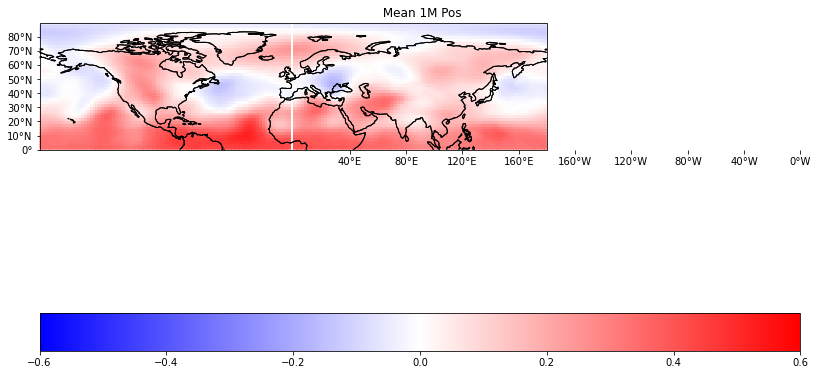

In [14]:
z=pos_z[((pos_z.time.dt.month>11) | (pos_z.time.dt.month<2)) & (pos_z.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))
zW=z.resample(time="1M").mean()
yW=y_pos.resample(time="1M").mean()
zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]
CC=xr.corr(yDJ, zDJ, dim="time")
CC
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

ax1.set_title(' Mean 1M Pos' )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)

<xarray.DataArray ()>
array(0.38105656)
Coordinates:
    longitude  float32 174.0
    latitude   float32 70.0
<xarray.DataArray ()>
array(-0.17151122)
Coordinates:
    longitude  float32 256.0
    latitude   float32 64.0


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


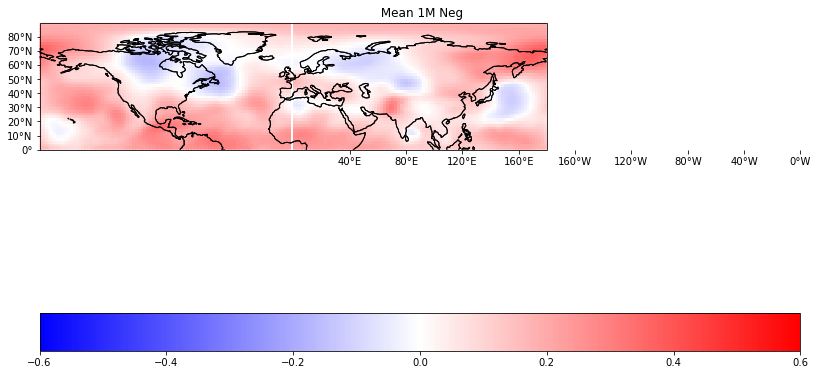

In [15]:
z=neg_z[((neg_z.time.dt.month>11) | (neg_z.time.dt.month<2)) & (neg_z.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))
zW=z.resample(time="1M").mean()
yW=y_neg.resample(time="1M").mean()
zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]
CC=xr.corr(yDJ, zDJ, dim="time")
CC
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

ax1.set_title(' Mean 1M Neg' )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)

<xarray.DataArray ()>
array(0.51220792)
Coordinates:
    longitude  float32 56.0
    latitude   float32 32.0
<xarray.DataArray ()>
array(-0.35466001)
Coordinates:
    longitude  float32 24.0
    latitude   float32 42.0


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


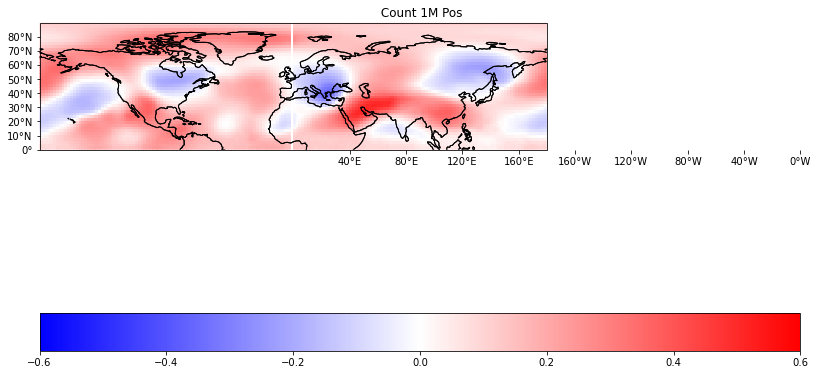

In [16]:
z=pos_z[((pos_z.time.dt.month>11) | (pos_z.time.dt.month<2)) & (pos_z.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))
zW=z.resample(time="1M").mean()
yW=y_pos[y_pos>=0.48].resample(time="1M").count()
zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]
CC=xr.corr(yDJ, zDJ, dim="time")
CC
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class


ax1.set_title(' Count 1M Pos' )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)

<xarray.DataArray ()>
array(0.29943817)
Coordinates:
    longitude  float32 338.0
    latitude   float32 16.0
<xarray.DataArray ()>
array(-0.29458848)
Coordinates:
    longitude  float32 264.0
    latitude   float32 36.0


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


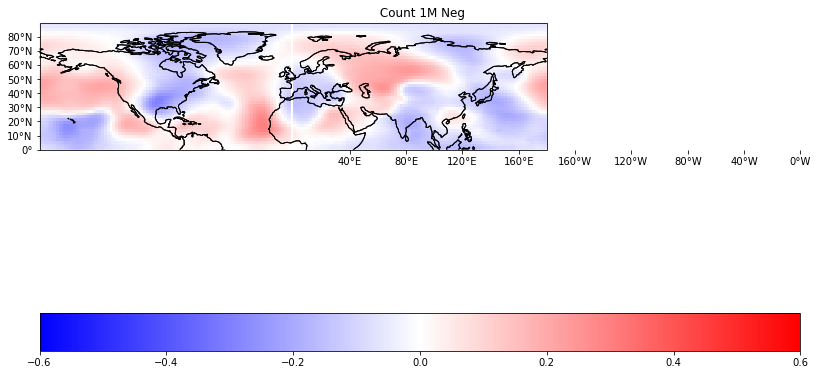

In [17]:
z=neg_z[((neg_z.time.dt.month>11) | (neg_z.time.dt.month<2)) & (neg_z.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))
zW=z.resample(time="1M").mean()
yW=y_neg[y_neg>=0.48].resample(time="1M").count()
zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]
CC=xr.corr(yDJ, zDJ, dim="time")
CC
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

ax1.set_title(' Count 1M Neg' )
#ax1.set_title(' GFDL All Widespread Fog Days Low Cloud %'+"    "+str(totalCnt) )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)